In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r'D:\Machine Learning Practical\Position_Salaries.csv')

In [3]:
print(data.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [5]:
X = data[['Level']].values  # Features (Position Level)
y = data['Salary'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Create and train the Simple Linear Regression model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred_simple = simple_model.predict(X_test)

In [9]:
simple_mse = mean_squared_error(y_test, y_pred_simple)
simple_rmse = np.sqrt(simple_mse)
simple_r2 = r2_score(y_test, y_pred_simple)

In [10]:
print(f"Simple Linear Regression - MSE: {simple_mse}, RMSE: {simple_rmse}, R²: {simple_r2}")

Simple Linear Regression - MSE: 7840057409.334121, RMSE: 88544.09867029039, R²: 0.8451346684575975


In [11]:
poly = PolynomialFeatures(degree=4)  # You can try different degrees (2, 3, 4, etc.)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [12]:
# Create and train the Polynomial Linear Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [13]:
y_pred_poly = poly_model.predict(X_poly_test)

In [14]:
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, y_pred_poly)

In [15]:
print(f"Polynomial Linear Regression - MSE: {poly_mse}, RMSE: {poly_rmse}, R²: {poly_r2}")


Polynomial Linear Regression - MSE: 1444499305.5506663, RMSE: 38006.569242049016, R²: 0.9714666803841844


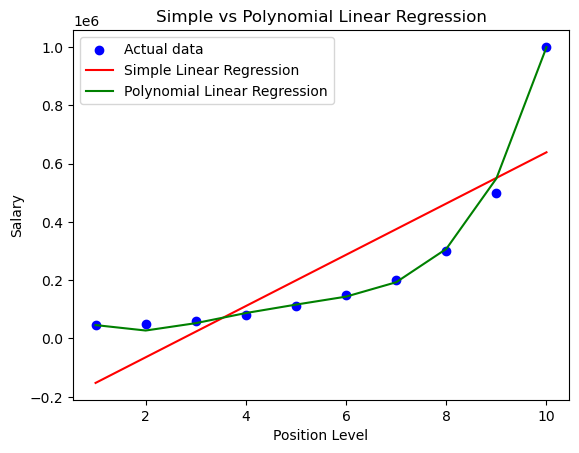

In [16]:
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, simple_model.predict(X), color='red', label='Simple Linear Regression')
plt.plot(X, poly_model.predict(poly.transform(X)), color='green', label='Polynomial Linear Regression')
plt.title('Simple vs Polynomial Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [17]:
# Predict salaries for level 11 and 12 using both models
level_11 = np.array([[11]])
level_12 = np.array([[12]])

In [18]:
# Simple Linear Regression predictions
salary_11_simple = simple_model.predict(level_11)
salary_12_simple = simple_model.predict(level_12)

In [19]:
# Polynomial Linear Regression predictions
salary_11_poly = poly_model.predict(poly.transform(level_11))
salary_12_poly = poly_model.predict(poly.transform(level_12))


In [20]:
print(f"Predicted salary for Level 11 (Simple Linear): {salary_11_simple[0]}")
print(f"Predicted salary for Level 12 (Simple Linear): {salary_12_simple[0]}")
print(f"Predicted salary for Level 11 (Polynomial): {salary_11_poly[0]}")
print(f"Predicted salary for Level 12 (Polynomial): {salary_12_poly[0]}")

Predicted salary for Level 11 (Simple Linear): 726508.6206896552
Predicted salary for Level 12 (Simple Linear): 814396.5517241377
Predicted salary for Level 11 (Polynomial): 1759103.6821705461
Predicted salary for Level 12 (Polynomial): 2949328.936944923
